# Defining & evaluating parameterizations with pyqg

In this notebook, we'll define a new parameterization, test it, and hopefully make it clear how you can define (or learn) your own!

## Imports

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import pyqg
import pyqg.diagnostic_tools
import pyqg.parameterizations as param
from pyqg.diagnostic_tools import calc_ispec
from pyqg_subgrid_experiments.dataset import pyqg_model_for

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/pp2681/pyqg_experiments/pyqg_subgrid_experiments/__init__.py:19: UserWarning: Unable to load differentiable_parameterizations, install autograd if you want to use these
  warnings.warn("Unable to load differentiable_parameterizations, install autograd if you want to use these")


In [2]:
def save_dataset(model, file):
    model.to_dataset().drop_vars(('qh', 'uh', 'vh', 'ph', 'dqhdt')).to_netcdf(file)

In [3]:
def get_diagnostic(file, name):
    try:
        return calc_ispec(pyqg_model_for(file), np.array(file[name].sum('lev').squeeze()))
    except:
        return calc_ispec(pyqg_model_for(file), np.array(file[name].squeeze()))

# Run base simulations

In [4]:
day = 86400
year = day*360
common_params = dict(dt=3600., tmax=10*year, tavestart=5*year, twrite=25000)

In [5]:
%%time
m_lowres = pyqg.QGModel(nx=64, **common_params)
m_lowres.run()
save_dataset(m_lowres, 'dump/lowres.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 5.70e-04, CFL: 0.045
INFO: Step: 50000, Time: 1.80e+08, KE: 4.67e-04, CFL: 0.041
INFO: Step: 75000, Time: 2.70e+08, KE: 4.81e-04, CFL: 0.047


CPU times: user 1min 41s, sys: 4min 42s, total: 6min 24s
Wall time: 47.6 s


In [66]:
%%time
m_highres = pyqg.QGModel(nx=256, **common_params)
m_highres.run()
save_dataset(m_highres, 'dump/highres.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 5.88e-04, CFL: 0.221
INFO: Step: 50000, Time: 1.80e+08, KE: 6.25e-04, CFL: 0.220
INFO: Step: 75000, Time: 2.70e+08, KE: 6.26e-04, CFL: 0.261


CPU times: user 17min 5s, sys: 27min 57s, total: 45min 3s
Wall time: 11min 47s


We can see that the high-resolution simulation takes much longer than the low-resolution simulation to run.

## Run the parameterized simulations

In [73]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ZannaBolton2020(),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ZBolton.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.41e-04, CFL: 0.044
INFO: Step: 50000, Time: 1.80e+08, KE: 4.10e-04, CFL: 0.037
INFO: Step: 75000, Time: 2.70e+08, KE: 4.38e-04, CFL: 0.046


CPU times: user 3min 43s, sys: 9min 44s, total: 13min 27s
Wall time: 1min 50s


In [ ]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.BackscatterBiharmonic(),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/backscatter.nc')

# Skip parameterizations

In [42]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ADM(skip=1),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ADM_skip1.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.60e-04, CFL: 0.037
INFO: Step: 50000, Time: 1.80e+08, KE: 3.92e-04, CFL: 0.037
INFO: Step: 75000, Time: 2.70e+08, KE: 4.21e-04, CFL: 0.040


CPU times: user 9min 17s, sys: 24min 54s, total: 34min 11s
Wall time: 4min 33s


In [43]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ADM(skip=4),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ADM_skip4.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.94e-04, CFL: 0.038
INFO: Step: 50000, Time: 1.80e+08, KE: 4.08e-04, CFL: 0.036
INFO: Step: 75000, Time: 2.70e+08, KE: 3.81e-04, CFL: 0.039


CPU times: user 3min 47s, sys: 10min 18s, total: 14min 6s
Wall time: 1min 51s


In [44]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ADM(skip=8),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ADM_skip8.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.41e-04, CFL: 0.043
INFO: Step: 50000, Time: 1.80e+08, KE: 3.41e-04, CFL: 0.038
INFO: Step: 75000, Time: 2.70e+08, KE: 3.63e-04, CFL: 0.035


CPU times: user 2min 47s, sys: 7min 27s, total: 10min 15s
Wall time: 1min 22s


In [45]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ADM(skip=24),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ADM_skip24.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.96e-04, CFL: 0.036
INFO: Step: 50000, Time: 1.80e+08, KE: 3.99e-04, CFL: 0.039
INFO: Step: 75000, Time: 2.70e+08, KE: 3.99e-04, CFL: 0.038


CPU times: user 2min 11s, sys: 5min 59s, total: 8min 11s
Wall time: 1min 2s


In [46]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=param.ADM(skip=48),
                       **common_params)
m_param.run()
save_dataset(m_param, 'dump/ADM_skip48.nc')

INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 4.67e-04, CFL: 0.043
INFO: Step: 50000, Time: 1.80e+08, KE: 4.85e-04, CFL: 0.042
INFO: Step: 75000, Time: 2.70e+08, KE: 4.99e-04, CFL: 0.051


CPU times: user 2min 1s, sys: 5min 34s, total: 7min 35s
Wall time: 57.5 s


# Diagnostics

In [48]:
ZB = xr.open_dataset('dump/ZBolton.nc')
highres = xr.open_dataset('dump/highres.nc')
lowres = xr.open_dataset('dump/lowres.nc')
back = xr.open_dataset('dump/backscatter.nc')

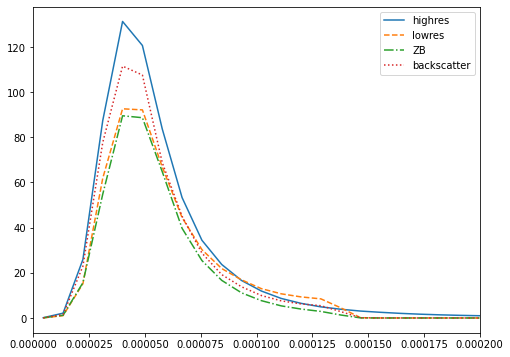

In [41]:
plt.figure(figsize=(8,6))
for m, label, ls in [(highres, 'highres', '-'), (lowres, 'lowres', '--'), (ZB, 'ZB', '-.'), (back, 'backscatter', ':')]:
    k, spec = get_diagnostic(m, 'KEspec')
    plt.plot(k, spec, label=label, ls=ls)
plt.xlim([0, 0.0002])
plt.legend()

In [64]:
adm1 = xr.open_dataset('dump/ADM_skip1.nc')
adm48 = xr.open_dataset('dump/ADM_skip48.nc')

/state/partition1/job-21030508/ipykernel_1041931/3638046087.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 0.0002])


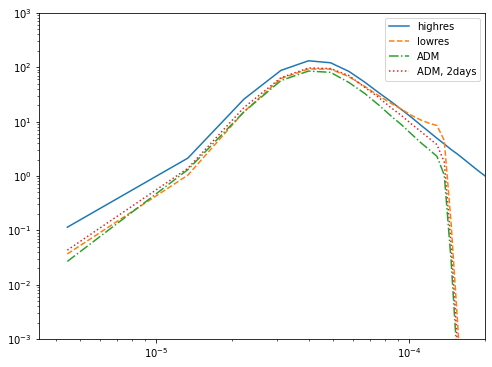

In [66]:
plt.figure(figsize=(8,6))
for m, label, ls in [(highres, 'highres', '-'), (lowres, 'lowres', '--'), (adm1, 'ADM', '-.'), (adm48, 'ADM, 2days', ':')]:
    k, spec = get_diagnostic(m, 'KEspec')
    plt.loglog(k, spec, label=label, ls=ls)
plt.xlim([0, 0.0002])
plt.ylim([1e-3,1e+3])
plt.legend()

## Plot some metrics

In [72]:
def plot_models(m1, m2, m3, labels):
    def plot_kwargs_for(m):
        return dict(
            label=f"nx={m.q.shape[0]}, {m.parameterization or 'unparameterized'}",
            ls=('--' if m.parameterization else '-')
        )

    with matplotlib.rc_context({'font.size': 15}):
        plt.figure(figsize=(16,8))

        plt.subplot(121, title="KE spectrum")
        for i, m in enumerate([m1, m2, m3]):
            k, spec = get_diagnostic(m, 'KEspec')
            plt.loglog(k, spec, label=labels[i])
        plt.legend()
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        plt.ylabel("KE density [$m^{2}s^{-2}$]")
        plt.ylim(spec[0]/10, spec.max()*10)

        plt.subplot(122, title="KE redistribution spectrum")
        for i, m in enumerate([m1, m2, m3]):
            k, spec = get_diagnostic(m, 'KEflux')
            plt.semilogx(k, spec, label=labels[i])
        k, spec = get_diagnostic(m, 'paramspec_KEflux')
        plt.semilogx(k, spec, label='SGS', ls='-.')
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        plt.ylabel("KE density flux [$m^{2}s^{-3}$]")
        plt.legend()

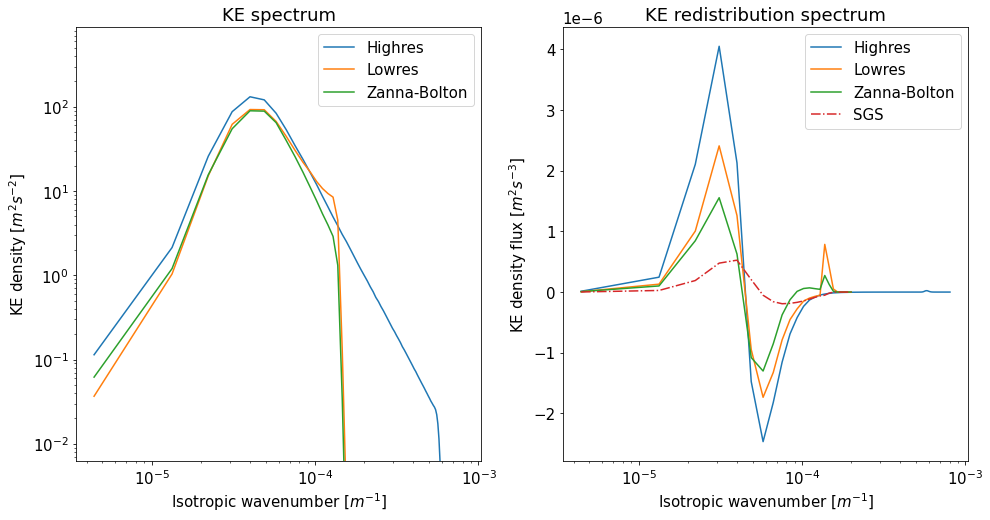

In [73]:
plot_models(highres, lowres, ZB, ['Highres', 'Lowres', 'Zanna-Bolton'])

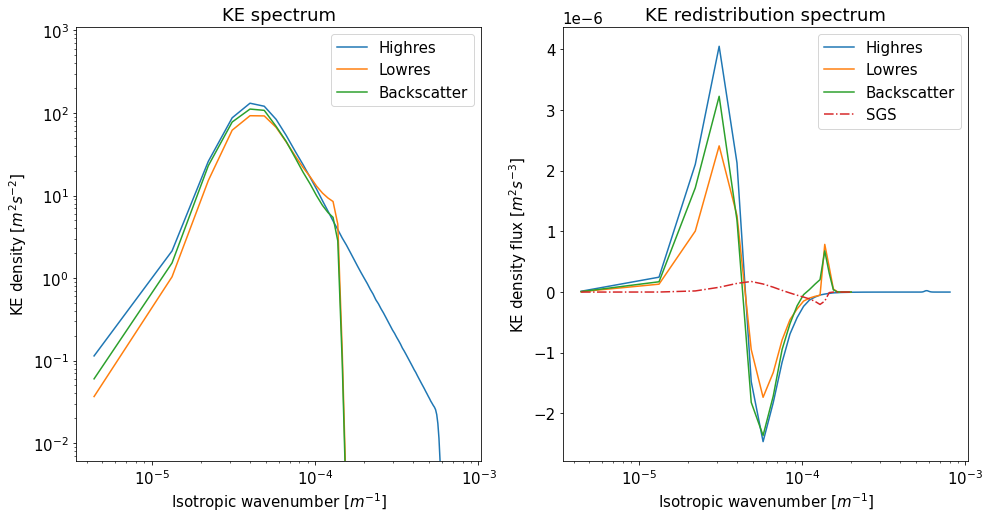

In [74]:
plot_models(highres, lowres, back, ['Highres', 'Lowres', 'Backscatter'])

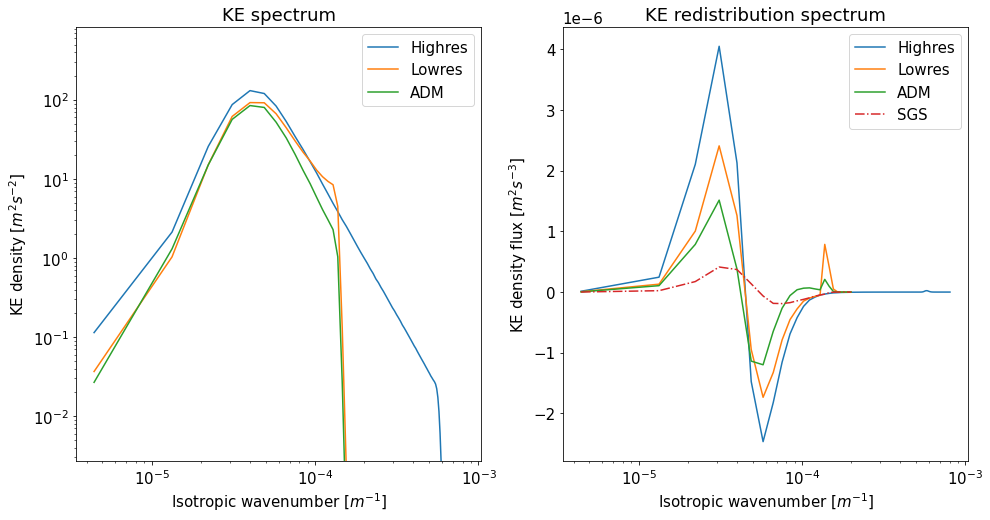

In [75]:
plot_models(highres, lowres, adm1, ['Highres', 'Lowres', 'ADM'])

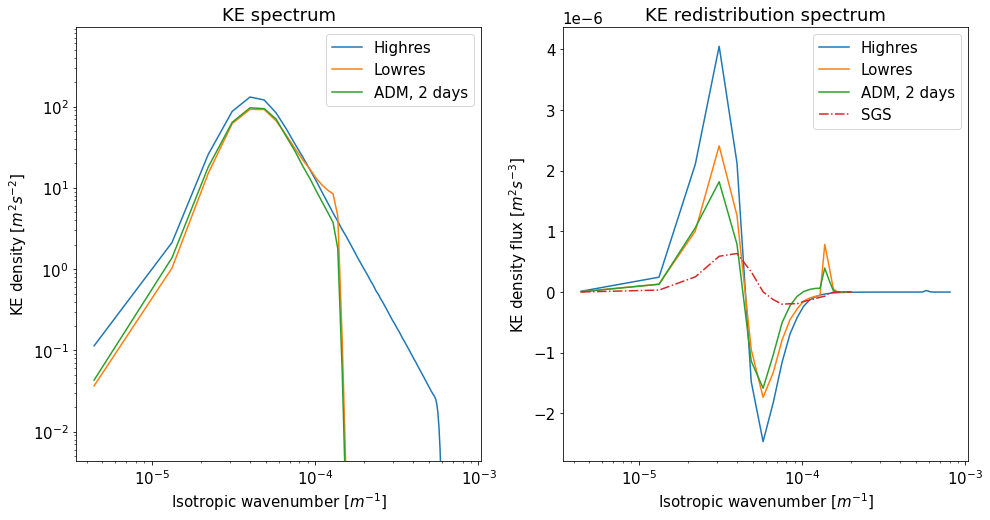

In [76]:
plot_models(highres, lowres, adm48, ['Highres', 'Lowres', 'ADM, 2 days'])